In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
read_data = np.load('data/DAW_DATA_DICT.npy').item()

In [77]:
n_simulations = 100



w_to_probs= {}
w_to_vars= {}

for w in read_data:
    
    prob_r1_rew_vect = np.zeros(n_simulations)
    var_r1_rew_vect = np.zeros(n_simulations)
    prob_r1_no_rew_vect = np.zeros(n_simulations)
    var_r1_no_rew_vect = np.zeros(n_simulations)
    
    
    R1 = read_data[w]['R1']
    S2 = read_data[w]['S2']
    RW = read_data[w]['Rw']

    for sim in range(n_simulations):
        R1_offset = R1[sim,1:]
        S2_offset = S2[sim, :-1]
        RW_offset = RW[sim, :-1]

        R1_masked = R1_offset[(S2_offset==2) & (RW_offset==1)]
        prob_r1_rew_vect[sim] = np.sum(R1_masked==2)/len(R1_masked)
        
        var_r1_rew_vect[sim] = prob_r1_rew_vect[sim]*len(R1_masked)*(1.0-prob_r1_rew_vect[sim])

        R1_masked = R1_offset[(S2_offset==2) & (RW_offset==0)]
        prob_r1_no_rew_vect[sim] = np.sum(R1_masked==2)/len(R1_masked)
        
        var_r1_no_rew_vect[sim] = prob_r1_no_rew_vect[sim]*len(R1_masked)*(1.0-prob_r1_no_rew_vect[sim])
        
    w_to_probs[w] = (prob_r1_rew_vect, prob_r1_no_rew_vect)
    w_to_vars[w] = (var_r1_rew_vect, var_r1_no_rew_vect)

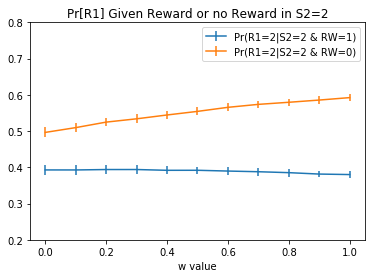

In [78]:
plt.figure()
sorted_keys = sorted(w_to_probs.keys())
plt.errorbar(sorted_keys, [np.mean(w_to_probs[key][0]) for key in sorted_keys],
             yerr=[np.std(w_to_probs[key][0]) for key in sorted_keys], label='Pr(R1=2|S2=2 & RW=1)')
plt.errorbar(sorted_keys, [np.mean(w_to_probs[key][1]) for key in sorted_keys],
         yerr=[np.std(w_to_probs[key][1]) for key in sorted_keys], label='Pr(R1=2|S2=2 & RW=0)')
plt.ylim((.2, .8))
plt.title('Pr[R1] Given Reward or no Reward in S2=2')
plt.xlabel('w value')
plt.legend()
plt.show()

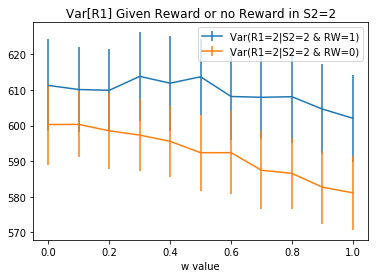

In [79]:
plt.figure()
sorted_keys = sorted(w_to_probs.keys())
plt.errorbar(sorted_keys, [np.mean(w_to_vars[key][0]) for key in sorted_keys],
             yerr=[np.std(w_to_vars[key][0]) for key in sorted_keys], label='Var(R1=2|S2=2 & RW=1)')
plt.errorbar(sorted_keys, [np.mean(w_to_vars[key][1]) for key in sorted_keys],
         yerr=[np.std(w_to_vars[key][1]) for key in sorted_keys], label='Var(R1=2|S2=2 & RW=0)')
plt.title('Var[R1] Given Reward or no Reward in S2=2')
plt.xlabel('w value')
plt.legend()
plt.show()

In [71]:
len(R1_masked)

2392

In [38]:
w_to_probs[0][0]

array([0.41154941, 0.38485317, 0.38342165, 0.38667183, 0.39624119,
       0.38746551, 0.38912621, 0.38491907, 0.39776235, 0.37727801,
       0.39002815, 0.41996951, 0.38674033, 0.3774584 , 0.38360908,
       0.3999239 , 0.37828571, 0.39630225, 0.39557453, 0.40443213,
       0.4       , 0.38497653, 0.39071038, 0.38617727, 0.37989911,
       0.37749902, 0.39503742, 0.41545524, 0.39426801, 0.39984351,
       0.39242006, 0.38158408, 0.37111373, 0.4004693 , 0.3878357 ,
       0.39491917, 0.40310078, 0.3940792 , 0.40086546, 0.39519817,
       0.38590343, 0.3894081 , 0.38989587, 0.38961554, 0.39322301,
       0.39530174, 0.40473373, 0.40007613, 0.38190955, 0.4018583 ,
       0.38384615, 0.38385752, 0.3902439 , 0.39866194, 0.38577343,
       0.38766859, 0.39557083, 0.39083558, 0.39112291, 0.38784696,
       0.39752514, 0.39533965, 0.39494471, 0.37973186, 0.4091273 ,
       0.37968113, 0.40205371, 0.38301158, 0.40266353, 0.38588235,
       0.3964497 , 0.3988024 , 0.39442077, 0.38322432, 0.40131

In [48]:
w_to_probs

{0.0: (array([0.41154941, 0.38485317, 0.38342165, 0.38667183, 0.39624119,
         0.38746551, 0.38912621, 0.38491907, 0.39776235, 0.37727801,
         0.39002815, 0.41996951, 0.38674033, 0.3774584 , 0.38360908,
         0.3999239 , 0.37828571, 0.39630225, 0.39557453, 0.40443213,
         0.4       , 0.38497653, 0.39071038, 0.38617727, 0.37989911,
         0.37749902, 0.39503742, 0.41545524, 0.39426801, 0.39984351,
         0.39242006, 0.38158408, 0.37111373, 0.4004693 , 0.3878357 ,
         0.39491917, 0.40310078, 0.3940792 , 0.40086546, 0.39519817,
         0.38590343, 0.3894081 , 0.38989587, 0.38961554, 0.39322301,
         0.39530174, 0.40473373, 0.40007613, 0.38190955, 0.4018583 ,
         0.38384615, 0.38385752, 0.3902439 , 0.39866194, 0.38577343,
         0.38766859, 0.39557083, 0.39083558, 0.39112291, 0.38784696,
         0.39752514, 0.39533965, 0.39494471, 0.37973186, 0.4091273 ,
         0.37968113, 0.40205371, 0.38301158, 0.40266353, 0.38588235,
         0.3964497 , 0.398802

In [57]:
read_data

{0.0: {'R1': array([[2, 1, 2, ..., 2, 1, 1],
         [2, 2, 2, ..., 1, 1, 1],
         [1, 2, 1, ..., 2, 2, 2],
         ...,
         [1, 1, 2, ..., 2, 2, 2],
         [1, 2, 2, ..., 1, 2, 2],
         [1, 1, 1, ..., 2, 2, 1]], dtype=uint8),
  'R2': array([[1, 2, 1, ..., 2, 2, 2],
         [2, 1, 2, ..., 2, 2, 1],
         [1, 1, 1, ..., 2, 1, 1],
         ...,
         [1, 1, 2, ..., 2, 1, 1],
         [2, 1, 1, ..., 2, 2, 2],
         [2, 1, 2, ..., 1, 2, 2]], dtype=uint8),
  'Rw': array([[1, 1, 0, ..., 1, 1, 0],
         [1, 1, 0, ..., 1, 0, 0],
         [1, 1, 0, ..., 0, 1, 0],
         ...,
         [1, 0, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 1, 0],
         [0, 1, 0, ..., 0, 1, 0]], dtype=uint8),
  'S2': array([[1, 2, 1, ..., 1, 1, 1],
         [1, 2, 1, ..., 1, 1, 2],
         [2, 2, 1, ..., 1, 1, 1],
         ...,
         [2, 1, 1, ..., 2, 1, 1],
         [2, 1, 1, ..., 2, 1, 1],
         [2, 2, 1, ..., 1, 1, 2]], dtype=uint8),
  'best_R1': array([[0, 0, 0, ..., 1, 1